In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [97]:
df.drop(['id'], axis = 'columns', inplace=True)

In [98]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,67.0,0,1,0,0,0,228.69,36.6,2,1
2,2,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,2,81.0,0,0,0,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,2,82.0,1,0,0,1,1,71.97,28.3,1,0
5102,1,57.0,0,0,0,0,1,77.93,21.7,1,0
5106,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,1,35.0,0,0,0,1,1,82.99,30.6,1,0


In [41]:
df = df[df["smoking_status"].str.contains("Unknown") == False]


In [42]:
df = df[df['gender'].str.contains('Other')==False]

In [43]:
df['ever_married']=df.ever_married.map({'Yes':0,'No':1})
df['Residence_type']=df.Residence_type.map({'Urban':0,'Rural':1})
df['work_type']=df.work_type.map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [44]:
df['gender']=df.gender.map({'Female':1,'Male':2})
df['smoking_status']=df.smoking_status.map({'never smoked':1,'formerly smoked':2,'smokes':3})


In [45]:
df['id'].drop

<bound method Series.drop of 0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5102    45010
5105    18234
5106    44873
5107    19723
5108    37544
Name: id, Length: 3565, dtype: int64>

In [46]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [47]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,0,0,0,228.69,36.6,2,1
1,51676,1,61.0,0,0,0,1,1,202.21,NaN,1,1
2,31112,2,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,1,57.0,0,0,0,0,1,77.93,21.7,1,0
5105,18234,1,80.0,1,0,0,0,0,83.75,NaN,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.6,1,0


In [48]:
test_data=df[df['bmi'].isnull()]

In [49]:
test_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,1,61.0,0,0,0,1,1,202.21,NaN,1,1
29,69160,2,59.0,0,0,0,0,1,211.78,NaN,2,1
43,1845,1,63.0,0,0,0,0,0,90.90,NaN,2,1
51,15102,2,78.0,1,0,0,0,0,75.32,NaN,2,1
54,8752,1,63.0,0,0,0,2,0,197.54,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,2,41.0,0,0,1,0,1,70.15,NaN,2,0
5048,28788,2,40.0,0,0,0,0,0,191.15,NaN,3,0
5093,32235,1,45.0,1,0,0,2,1,95.02,NaN,3,0
5099,7293,2,40.0,0,0,0,0,1,83.94,NaN,3,0


In [50]:
df['gender'].value_counts()

1    2158
2    1407
Name: gender, dtype: int64

In [51]:
df['smoking_status'].value_counts()

1    1892
2     884
3     789
Name: smoking_status, dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [54]:
df.shape

(3425, 12)

In [55]:
y_train = df['bmi']

In [56]:
y_train.shape

(3425,)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   int64  
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   int64  
 6   work_type          3425 non-null   int64  
 7   Residence_type     3425 non-null   int64  
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   int64  
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 347.9 KB


In [58]:
df['ever_married'].value_counts()

0    2599
1     826
Name: ever_married, dtype: int64

In [59]:
df['Residence_type'].value_counts()

0    1745
1    1680
Name: Residence_type, dtype: int64

In [60]:
df['work_type'].value_counts()

0    2200
1     629
2     514
3      68
4      14
Name: work_type, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   int64  
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   int64  
 6   work_type          3425 non-null   int64  
 7   Residence_type     3425 non-null   int64  
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   int64  
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 347.9 KB


In [62]:
X = df.loc[:, df.columns[(df.columns != 'bmi')]]
y = df.loc[:, 'bmi'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
X_test=test_data.drop('bmi',axis=1)

In [67]:
X_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
1,51676,1,61.0,0,0,0,1,1,202.21,1,1
29,69160,2,59.0,0,0,0,0,1,211.78,2,1
43,1845,1,63.0,0,0,0,0,0,90.90,2,1
51,15102,2,78.0,1,0,0,0,0,75.32,2,1
54,8752,1,63.0,0,0,0,2,0,197.54,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,2,41.0,0,0,1,0,1,70.15,2,0
5048,28788,2,40.0,0,0,0,0,0,191.15,3,0
5093,32235,1,45.0,1,0,0,2,1,95.02,3,0
5099,7293,2,40.0,0,0,0,0,1,83.94,3,0


In [68]:
X_test.shape

(140, 11)

In [69]:
y_pred= lr.predict(X_test)

In [70]:
y_pred

array([31.80665989, 32.8429967 , 29.83423665, 31.9982719 , 31.12431257,
       32.85382129, 28.24200155, 31.33698428, 30.15710482, 29.45287993,
       32.00862801, 30.64659384, 29.01892132, 28.76430473, 28.61242651,
       31.95031383, 30.2761534 , 27.10651196, 28.66150298, 30.5308667 ,
       33.0057383 , 28.76723409, 29.98037121, 34.4861936 , 29.6647741 ,
       36.0120386 , 31.29805016, 31.20417956, 29.0270873 , 32.53763851,
       30.2217263 , 33.88292384, 30.69354589, 28.37235773, 29.76052994,
       27.39869738, 28.61591866, 28.27394608, 31.03944184, 31.68389325,
       33.67319552, 31.79057828, 29.73772551, 33.26395805, 33.23165411,
       30.25877366, 29.90980296, 31.3211573 , 31.11196824, 35.01061019,
       33.46503175, 34.71840044, 30.32517451, 31.20448782, 32.58291481,
       28.07806557, 28.99910855, 35.32260041, 32.52011595, 30.63064579,
       31.15406699, 33.73057188, 29.63298717, 33.15701721, 28.98357578,
       27.59481553, 32.5841002 , 27.98366919, 29.9380114 , 30.29

In [71]:
y_pred.shape

(140,)

In [72]:
test_data.loc[test_data.bmi.isnull(),'bmi'] = y_pred

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [73]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,0,0,0,228.69,36.6,2,1
2,31112,2,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,56669,2,81.0,0,0,0,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,2,82.0,1,0,0,1,1,71.97,28.3,1,0
5102,45010,1,57.0,0,0,0,0,1,77.93,21.7,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.6,1,0


In [74]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [75]:
df.duplicated().sum()

0

In [76]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,0,0,0,228.69,36.6,2,1
2,31112,2,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,56669,2,81.0,0,0,0,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,2,82.0,1,0,0,1,1,71.97,28.3,1,0
5102,45010,1,57.0,0,0,0,0,1,77.93,21.7,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.6,1,0


In [77]:
df['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

In [78]:
X = df.loc[:, df.columns[(df.columns != 'stroke')]]
y = df.loc[:, 'stroke'].values

In [79]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0,stratify=y)

In [80]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([2271,  126], dtype=int64))

In [82]:
log_reg= LogisticRegression (C=1.0,
                            multi_class='ovr')

In [83]:
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [84]:
log_reg.score(X_train,y_train)

0.9478514810179391

In [85]:
log_reg.score(X_test,y_test)

0.9474708171206225

In [86]:
logreg = LogisticRegression()
# Entrenar el modelo sobre los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)

In [87]:
cm = metrics.confusion_matrix(y_test, predictions).ravel()
cm

array([974,   0,  54,   0], dtype=int64)

In [88]:
tn, fp, fn, tp = cm

In [89]:
specificity = tn / (tn + fp)

In [90]:
specificity 

1.0

In [91]:
sensitivity = tp/ (tp + fn)

In [92]:
sensitivity

0.0

In [93]:
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')

Training AUC: 0.8200953359473836


In [94]:
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Testing AUC: 0.8607308540573428


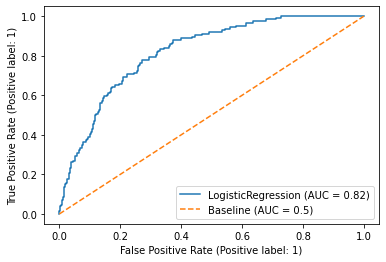

In [95]:
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Las metricas de ROC y AUC resultaron más eficientes para mi modelo

# Contexto STROKE
Un derrame cerebral ocurre cuando hay una perdida de sangre en una parte del cerebro, por lo cual, las neuronas no consiguen el oxigeno y nutrientes que necesitan del cerebro y empiezan a morir. Esto puede causar daño perdurable, discapacidad a largo o plazo o incluso la muerte (fuente: https://medlineplus.gov/stroke.html). Según la biblioteca nacional de medicina estadounidense los factores asociados son alta presión sanguinea, diabetes, enfermedades cardiacas, tabaquismo, historial personal o familiar de derrame cereberal, edad y raza o etnia(término discutido en la actualidad). De acuerdo a esto, nuestro modelo tiene algunas desvenetajas, a saber, que no considera ni el historial ni elementos étnicos o raciales, tampoco diabetes. 
Otro desperfecto de mi modelo es que se usa la edad cronológica, esto en contraposición a los hallazgos más recientes, es menos relevante que la edad cerebral para predecir un derrame cerebral(https://2022.eso-conference.org/wp-content/uploads/2022/05/%E2%80%98Brain-age-biomarkers-predict-stroke-recovery_Thur5-May-0.01.pdf)



# Información sobre tus datos

# VISUALIZACIONES 

# Técnicas de modelado


knn:  No hay una fase de entrenamiento

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=1)

In [131]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [132]:
predictions = knn.predict(X)

In [133]:
score = knn.score(X, y)
score

1.0

In [136]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [137]:
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [143]:
pd.DataFrame(y_train)[0].value_counts(dropna = False)

0    2271
1     126
Name: 0, dtype: int64

In [144]:
score = clf.score(X_test, y_test)
score

0.9474708171206225

In [145]:
clf.oob_score_

0.9453483521068001

In [146]:
estimator_range = [1] + list(range(10, 310, 10))

In [147]:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

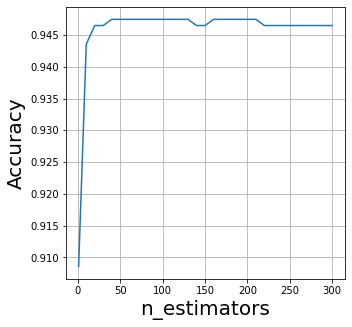

In [148]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

In [150]:
example_df = pd.DataFrame(data = {'age': X_test.flatten(),
                     'stroke': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

ValueError: All arrays must be of the same length

# Resultados

# Conclusiones

# Recomendaciones

In [96]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,0,0,0,228.69,36.6,2,1
2,31112,2,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,56669,2,81.0,0,0,0,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,2,82.0,1,0,0,1,1,71.97,28.3,1,0
5102,45010,1,57.0,0,0,0,0,1,77.93,21.7,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.6,1,0


<AxesSubplot:>

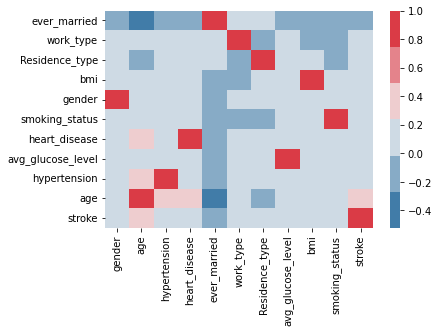

In [102]:
sns.heatmap(df.corr().sort_values(by = ['stroke']), cmap = sns.diverging_palette(240, 10))

Text(0.5, 0, 'age')

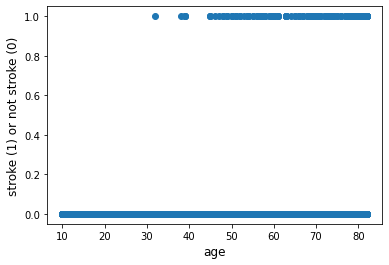

In [104]:
plt.scatter(df['age'], df['stroke'])
plt.ylabel('stroke (1) or not stroke (0)', fontsize = 12)
plt.xlabel('age', fontsize = 12)

In [120]:
df['age'].describe()

count    3425.000000
mean       48.652555
std        18.850018
min        10.000000
25%        34.000000
50%        50.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

In [126]:
condiciones = [
    (df['age']>10) &  (df['age']<25),
    (df['age'] >25) & (df['age'] <40),
    (df['age'] >40) & (df['age'] <65),
    (df['age'] >65 & (df['age']<82))
]
valores = ['Teenagers','Young Adult', 'Middle Adult', 'Old Adult']
df ['Age Stage'] =np.select(condiciones,valores)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Middle Adult'),
  Text(1, 0, 'Old Adult'),
  Text(2, 0, 'Teenagers'),
  Text(3, 0, 'Young Adult')])

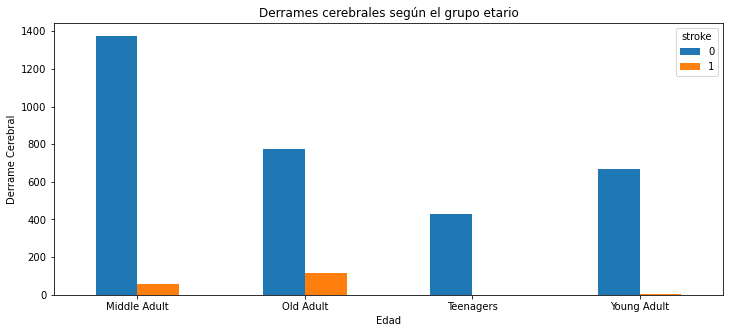

In [127]:
pd.crosstab(df['Age Stage'],df['stroke']).plot(kind='bar',figsize=(12,5))
plt.title("Derrames cerebrales según el grupo etario")
plt.xlabel('Edad')
plt.ylabel('Derrame Cerebral')
plt.xticks(rotation=0)